## FLAML for hp optimisation and model selection
We use FLAML twice, first to find the best component model for each estimator, and then to optimise the estimators themselves and choose the best estimator. Here we show how it's done

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import warnings
# warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now.. 

# the below checks for whether we run dowhy and auto-causality from source
root_path = root_path = os.path.realpath('../..')
try: 
    import auto_causality
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "auto-causality"))
    
try:
    import dowhy
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "dowhy"))

In [2]:
from auto_causality import AutoCausality
from auto_causality.datasets import synth_ihdp, preprocess_dataset
from auto_causality.scoring import ate

### Model fitting & scoring
Here we fit a (selection of) model(s) to the data and score them with the ERUPT metric on held-out data

In [6]:
# import dataset
data_df = synth_ihdp()
data_df, features_X, features_W, targets, treatment = preprocess_dataset(data_df)
outcome = targets[0]

# choose which estimators to fit
estimator_list = ["metalearners",
                  ".LinearDML",
                  "SparseLinearDML", 
                  "CasualForestDML",
                  "TransformedOutcome", 
                  "ForestDRLearner", 
                  "LinearDRLearner"]

# init autocausality object with chosen metric to optimise
ac = AutoCausality(
    time_budget=180, 
    estimator_list=estimator_list, 
    metric="erupt", 
    verbose=3,
    components_verbose=2,
    components_time_budget=30,
    use_ray=False
)

# run autocausality
myresults = ac.fit(data_df, treatment, outcome, features_W, features_X)

# return best estimator
print(f"Best estimator: {ac.best_estimator}")
# config of best estimator:
print(f"best config: {ac.best_config}")
# best score:
print(f"best score: {ac.best_score}")


[flaml.automl: 03-18 12:18:00] {2145} WARNING - Time taken to find the best model is 77% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 03-18 12:18:30] {2145} WARNING - Time taken to find the best model is 81% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 03-18 12:19:00] {2145} WARNING - Time taken to find the best model is 71% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Starting fit of  backdoor.econml.metalearners.SLearner
config: {'overall_model': AutoML(append_log=False, auto_augment=True, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', gpu_per_trial=0,
       hpo_method='auto', keep_search_state=False, learner_selector='sample',
       log_file_name='', log_training_metric=False, log_type='better',
       max_iter=1000000, mem_thres=4294967296, metric='auto',
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=1e-05, retrain_full=True,
       sample=True, split_ratio=0.1, split_type='auto', starting_points={},
       task='regression', time_budget=30, train_time_limit=inf, ...)}



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

... Estimator: backdoor.econml.metalearners.SLearner
 erupt (validation): 6.345588
 qini (validation): -0.002995
 auc (validation): 0.566028
 ate (validation): 3.864478
 r_score (validation): 0.114748
Starting fit of  backdoor.econml.metalearners.TLearner
config: {'models': AutoML(append_log=False, auto_augment=True, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', gpu_per_trial=0,
       hpo_method='auto', keep_search_state=False, learner_selector='sample',
       log_file_name='', log_training_metric=False, log_type='better',
       max_iter=1000000, mem_thres=4294967296, metric='auto',
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=1e-05, retrain_full=True,
       sample=True, split_ratio=0.1, split_type='auto', starting_points={},
       task='regression', time_budget=30, train_time_limit=inf, ...)}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

... Estimator: backdoor.econml.metalearners.TLearner
 erupt (validation): 6.344031
 qini (validation): 0.009980
 auc (validation): 0.558817
 ate (validation): 4.018382
 r_score (validation): 0.121511
Starting fit of  backdoor.econml.metalearners.XLearner
config: {'propensity_model': DummyClassifier(), 'models': AutoML(append_log=False, auto_augment=True, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', gpu_per_trial=0,
       hpo_method='auto', keep_search_state=False, learner_selector='sample',
       log_file_name='', log_training_metric=False, log_type='better',
       max_iter=1000000, mem_thres=4294967296, metric='auto',
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=1e-05, retrain_full=True,
       sample=True, split_ratio=0.1, split_type='auto', starting_points={},
       task='regression', time_budget=30, train_time_limit=inf, ...)}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[flaml.automl: 03-18 12:21:01] {2145} WARNING - Time taken to find the best model is 76% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 03-18 12:22:01] {2145} WARNING - Time taken to find the best model is 90% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

... Estimator: backdoor.econml.metalearners.XLearner
 erupt (validation): 6.339806
 qini (validation): -0.003424
 auc (validation): 0.551072
 ate (validation): 3.962817
 r_score (validation): 0.067454
Starting fit of  backdoor.econml.metalearners.DomainAdaptationLearner
config: {'propensity_model': DummyClassifier(), 'models': AutoML(append_log=False, auto_augment=True, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', gpu_per_trial=0,
       hpo_method='auto', keep_search_state=False, learner_selector='sample',
       log_file_name='', log_training_metric=False, log_type='better',
       max_iter=1000000, mem_thres=4294967296, metric='auto',
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=1e-05, retrain_full=True,
       sample=True, split_ratio=0.1, split_type='auto', starting_points={},
       task='regression', time_budget=30, train_time_limit=inf, ...), 'final_models': AutoML(

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[flaml.automl: 03-18 12:24:01] {2145} WARNING - Time taken to find the best model is 72% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

... Estimator: backdoor.econml.metalearners.DomainAdaptationLearner
 erupt (validation): 6.344031
 qini (validation): -0.004313
 auc (validation): 0.564290
 ate (validation): 4.022716
 r_score (validation): 0.117756
Starting fit of  backdoor.econml.dml.LinearDML


[flaml.tune.tune: 03-18 12:26:05] {108} INFO - result: {'erupt': 6.339806244923517, 'qini': 0.008907740539765637, 'auc': 0.5457497459010261, 'ate': 3.8234257322481215, 'r_score': 0.07633430650705464, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002717005E130>, 'scores': {'estimator_name': 'backdoor.econml.dml.LinearDML', 'train': {'erupt': 6.453726639789822, 'qini': 0.04672983731011277, 'auc': 0.5438881214593595, 'r_score': 0.07183621452991507, 'ate': 3.7347450685937957, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027170643F70>, 'values':      treated  y_factual        p  policy   weights
0        0.0   2.409362  0.18928    True  0.000000
1        1.0   5.042879  0.18928    True  5.283186
2        0.0   0.338121  0.18928    True  0.000000
3        0.0   3.364810  0.18928    True  0.000000
4        0.0   2.900619  0.18928    True  0.000000
..       ...        ...      ...     ...       ...
592      0.0   2.610829  0.189

... Estimator: backdoor.econml.dml.LinearDML
 erupt (validation): 6.339806
 qini (validation): 0.008908
 auc (validation): 0.545750
 ate (validation): 3.823426
 r_score (validation): 0.076334
Starting fit of  backdoor.econml.dml.SparseLinearDML


[flaml.tune.tune: 03-18 12:33:06] {108} INFO - result: {'erupt': 6.339806244923517, 'qini': 0.02197550677276042, 'auc': 0.5458079792236759, 'ate': 3.977403078584226, 'r_score': 0.061842036835615066, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x00000271704090D0>, 'scores': {'estimator_name': 'backdoor.econml.dml.SparseLinearDML', 'train': {'erupt': 6.453726639789822, 'qini': 0.04899783513856434, 'auc': 0.5427538371681345, 'r_score': 0.07316092118660678, 'ate': 3.886560672747979, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x00000271705C9490>, 'values':      treated  y_factual        p  policy   weights
0        0.0   2.409362  0.18928    True  0.000000
1        1.0   5.042879  0.18928    True  5.283186
2        0.0   0.338121  0.18928    True  0.000000
3        0.0   3.364810  0.18928    True  0.000000
4        0.0   2.900619  0.18928    True  0.000000
..       ...        ...      ...     ...       ...
592      0.0   2.610829  0

... Estimator: backdoor.econml.dml.SparseLinearDML
 erupt (validation): 6.339806
 qini (validation): 0.021976
 auc (validation): 0.545808
 ate (validation): 3.977403
 r_score (validation): 0.061842
Starting fit of  backdoor.auto_causality.models.TransformedOutcome
config: {'propensity_model': DummyClassifier(), 'outcome_model': AutoML(append_log=False, auto_augment=True, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', gpu_per_trial=0,
       hpo_method='auto', keep_search_state=False, learner_selector='sample',
       log_file_name='', log_training_metric=False, log_type='better',
       max_iter=1000000, mem_thres=4294967296, metric='auto',
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=1e-05, retrain_full=True,
       sample=True, split_ratio=0.1, split_type='auto', starting_points={},
       task='regression', time_budget=30, train_time_limit=inf, ...)}


[flaml.automl: 03-18 12:33:36] {2145} WARNING - Time taken to find the best model is 75% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

... Estimator: backdoor.auto_causality.models.TransformedOutcome
 erupt (validation): 6.236153
 qini (validation): 0.125730
 auc (validation): 0.517814
 ate (validation): 4.039394
 r_score (validation): -0.382115
Starting fit of  backdoor.econml.dr.ForestDRLearner


[flaml.tune.tune: 03-18 12:38:39] {108} INFO - result: {'erupt': 6.339806244923517, 'qini': -0.009078821099175639, 'auc': 0.531699395625868, 'ate': 3.984878482831097, 'r_score': -0.00947018465720384, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000027170622580>, 'scores': {'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'train': {'erupt': 6.453726639789822, 'qini': -0.010068902473960861, 'auc': 0.4858894677005285, 'r_score': -0.004234069548783692, 'ate': 3.984878482831096, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027173F76E80>, 'values':      treated  y_factual        p  policy   weights
0        0.0   2.409362  0.18928    True  0.000000
1        1.0   5.042879  0.18928    True  5.283186
2        0.0   0.338121  0.18928    True  0.000000
3        0.0   3.364810  0.18928    True  0.000000
4        0.0   2.900619  0.18928    True  0.000000
..       ...        ...      ...     ...       ...
592      0.0   2.61082

... Estimator: backdoor.econml.dr.ForestDRLearner
 erupt (validation): 6.339806
 qini (validation): -0.009079
 auc (validation): 0.531699
 ate (validation): 3.984878
 r_score (validation): -0.009470
Starting fit of  backdoor.econml.dr.LinearDRLearner


[flaml.tune.tune: 03-18 12:39:41] {108} INFO - result: {'erupt': 6.339806244923517, 'qini': -0.011784151735352397, 'auc': 0.5480406230901765, 'ate': 4.020776378613781, 'r_score': 0.059927696555612586, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000002716F8000D0>, 'scores': {'estimator_name': 'backdoor.econml.dr.LinearDRLearner', 'train': {'erupt': 6.453726639789822, 'qini': 0.015175896872576826, 'auc': 0.5497514392888241, 'r_score': 0.06658912017517249, 'ate': 3.944706939287527, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000027172927BE0>, 'values':      treated  y_factual        p  policy   weights
0        0.0   2.409362  0.18928    True  0.000000
1        1.0   5.042879  0.18928    True  5.283186
2        0.0   0.338121  0.18928    True  0.000000
3        0.0   3.364810  0.18928    True  0.000000
4        0.0   2.900619  0.18928    True  0.000000
..       ...        ...      ...     ...       ...
592      0.0   2.610829 

... Estimator: backdoor.econml.dr.LinearDRLearner
 erupt (validation): 6.339806
 qini (validation): -0.011784
 auc (validation): 0.548041
 ate (validation): 4.020776
 r_score (validation): 0.059928
Starting fit of  backdoor.econml.dr.SparseLinearDRLearner


[flaml.tune.tune: 03-18 12:49:53] {108} INFO - result: {'erupt': 6.339806244923517, 'qini': 0.07447477573216826, 'auc': 0.5585683697336633, 'ate': 15.472110811869303, 'r_score': -10.72100492227051, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x00000271704609A0>, 'scores': {'estimator_name': 'backdoor.econml.dr.SparseLinearDRLearner', 'train': {'erupt': 6.453726639789822, 'qini': 0.06580349276345526, 'auc': 0.5351330219819558, 'r_score': -13.54326934151082, 'ate': 15.201021932477328, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000002716FB35580>, 'values':      treated  y_factual        p  policy   weights
0        0.0   2.409362  0.18928    True  0.000000
1        1.0   5.042879  0.18928    True  5.283186
2        0.0   0.338121  0.18928    True  0.000000
3        0.0   3.364810  0.18928    True  0.000000
4        0.0   2.900619  0.18928    True  0.000000
..       ...        ...      ...     ...       ...
592      0.0   2.61082

... Estimator: backdoor.econml.dr.SparseLinearDRLearner
 erupt (validation): 6.339806
 qini (validation): 0.074475
 auc (validation): 0.558568
 ate (validation): 15.472111
 r_score (validation): -10.721005
Best estimator: backdoor.econml.metalearners.SLearner
best config: {}
best score: 6.345588313762957


In [7]:
outcome = targets[0]
baseline_scores={"estimator": "baseline",
                               "outcome": outcome,
                              "train":{"erupt": ac.train_df[outcome].mean(),
                                       "ate": ate(ac.train_df[treatment],ac.train_df[outcome])[0]},
                              "validation":{"erupt": ac.test_df[outcome].mean(),
                                      "ate": ate(ac.test_df[treatment],ac.test_df[outcome])[0]}}
ac.full_scores = {"baseline": baseline_scores, **ac.full_scores}

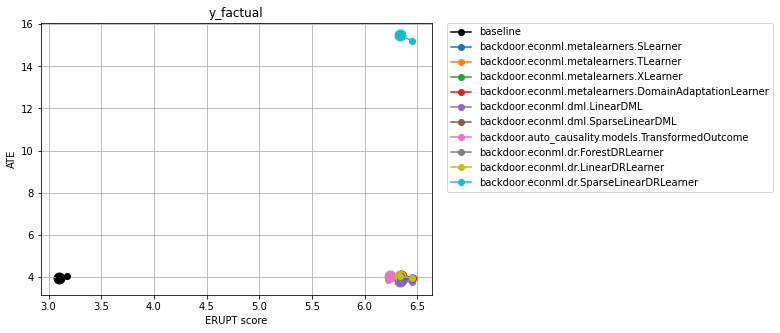

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])

v = ac.full_scores
plt.figure(figsize = (7,5))
plt.title(outcome)
for (est, scr),col in zip(v.items(),colors):
    sc = [scr['train']['erupt'], scr['validation']['erupt']]
    crv = [scr['train']['ate'], scr['validation']['ate']]
    plt.plot(sc, crv, color=col, marker="o")
    plt.scatter(sc[1:],crv[1:], c=col, s=120 )
    plt.xlabel("ERUPT score")
    plt.ylabel("ATE")

    plt.legend(v.keys(),bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.grid()
plt.show()


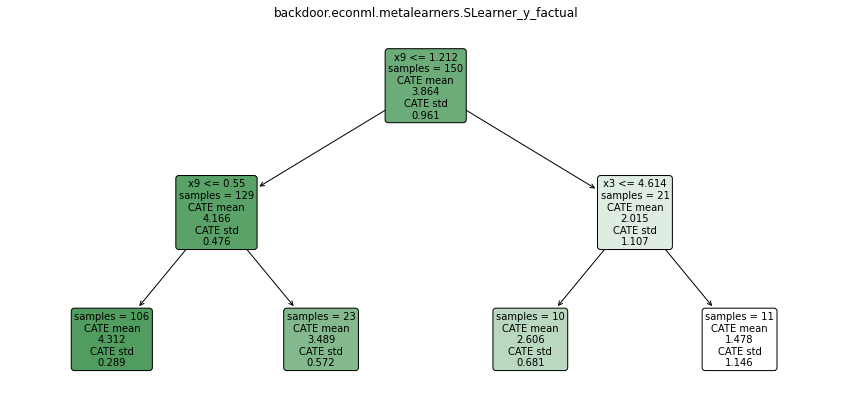

In [10]:
scr = ac.full_scores[ac.best_estimator]
intrp = scr['validation']['intrp']
plt.figure(figsize=(15, 7))
try: 
    feature_names = intrp.feature_names
except:
    feature_names = features_X + [ w for w in features_W if w not in features_X]
intrp.plot(feature_names=intrp.feature_names, fontsize=10)
#         intrp.plot( fontsize=10)
plt.title(f"{ac.best_estimator}_{outcome}")
plt.show()


y_factual backdoor.econml.metalearners.SLearner



Permutation explainer: 101it [00:10,  1.46it/s]                                                                        


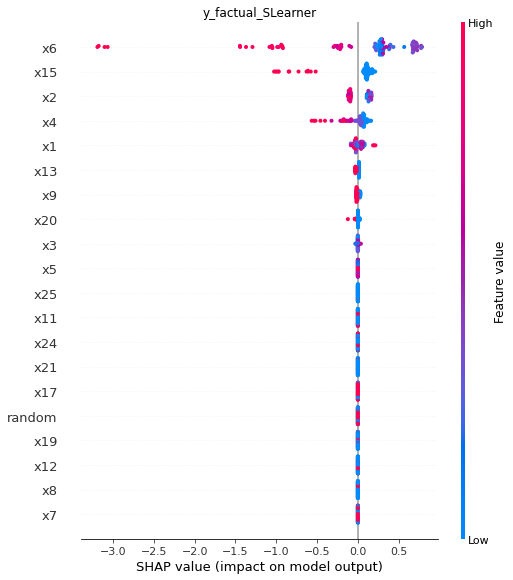

In [11]:
# TODO: add SHAP plots!
import matplotlib.pyplot as plt
import shap

# and now let's visualize feature importances!
from auto_causality.shap import shap_values

# Shapley values calculation can be slow so let's subsample
this_df = ac.test_df.sample(100)

wanted = ["CausalForestDML"]#,"ForestDRLearner","DirectUpliftDoWhyWrapper"]#,"CausalForestDML",]

scr = ac.full_scores[ac.best_estimator]
print(outcome, ac.best_estimator)
est = ac.estimates[ac.best_estimator]
shaps = shap_values(est, this_df)

plt.title(outcome + '_' + ac.best_estimator.split('.')[-1])
shap.summary_plot(shaps, this_df[est.estimator._effect_modifier_names])
plt.show()
